In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib import rc
import seaborn as sns
from scipy import stats

In [2]:
dades_totals_cat = pd.read_excel("dades.xlsx", sheet_name = "Catalonia")
dades_totals_BH = pd.read_excel("dades.xlsx", sheet_name = "BH")
dades_totals_LRI = pd.read_excel("dades.xlsx", sheet_name = "LRI")
dades_totals_rome = pd.read_excel("dades.xlsx", sheet_name = "Rome")
dades_totals_glas = pd.read_excel("dades.xlsx", sheet_name = "Glasgow")
dades_totals_edi = pd.read_excel("dades.xlsx", sheet_name = "Edinburgh")
dades_totals_ice = pd.read_excel("dades.xlsx", sheet_name = "Iceland")
dades_totals_romania = pd.read_excel("dades.xlsx", sheet_name = "Romania")

In [3]:
dades_totals_cat

,Catalonia,2018-2019,2018-2019.1,2018-2019.2,2019-2020,2019-2020.1,2019-2020.2,2020-2021,2020-2021.1,2020-2021.2,...,2021-2022.2,2022-2023,2022-2023.1,2022-2023.2,2023-2024,2023-2024.1,2023-2024.2,2024-2025,2024-2025.1,2024-2025.2
0,Attendances to ED,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,...,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m
1,All Diagnoses,56668,59562,114458,46438,44728,84575,37132,37509,79794,...,99461,55721,55185,98344,50552,53664,97547,50902,53209,98164
2,Respiratory Diasgnoses (not including Bronchio...,5580,9026,16911,3779,5925,11681,1984,3490,8374,...,12438,5084,7043,13046,4399,6785,13062,4553,6688,13100
3,Bronchiolitis,6263,2747,1048,5612,2403,948,2142,1408,1005,...,1307,7023,3167,1575,3242,2524,1312,2634,1949,1299
4,% of Respiratory Diagnoses among all diagnoses,0.098468,0.15154,0.147749,0.081377,0.132467,0.138114,0.053431,0.093044,0.104945,...,0.125054,0.09124,0.127625,0.132657,0.087019,0.126435,0.133905,0.089446,0.125693,0.13345
5,% Bronchiolitis among all diagnoses,0.110521,0.04612,0.009156,0.120849,0.053725,0.011209,0.057686,0.037538,0.012595,...,0.013141,0.126039,0.057389,0.016015,0.064132,0.047033,0.01345,0.051746,0.036629,0.013233
6,Total ED Admissions,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,...,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m,<6m,6-11m,12m-23m
7,All Diagnoses,21558,4046,7540,20771,3088,5503,18862,2596,5257,...,6190,22396,4124,7239,19321,3352,6596,20378,3230,6456
8,Respiratory Diasgnoses (not including Bronchi...,476,748,1368,367,459,976,140,188,674,...,1183,527,703,1435,410,577,1316,418,472,1228
9,Bronchiolitis,2204,443,209,1883,402,225,716,275,243,...,334,2441,614,372,952,479,294,782,303,290


In [4]:
dades_totals_cat2 = dades_totals_cat.T
dades_totals_cat2.columns = dades_totals_cat2.iloc[0]  # The first row becomes the header
dades_totals_cat2 = dades_totals_cat2.iloc[1:]
dades_totals_cat2.loc[:, 'Season'] = dades_totals_cat2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_cat2.loc[:, 'Season'] = dades_totals_cat2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_BH2 = dades_totals_BH.T
dades_totals_BH2.columns = dades_totals_BH2.iloc[0]  # The first row becomes the header
dades_totals_BH2 = dades_totals_BH2.iloc[1:]
dades_totals_BH2.loc[:, 'Season'] = dades_totals_BH2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_BH2.loc[:, 'Season'] = dades_totals_BH2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_LRI2 = dades_totals_LRI.T
dades_totals_LRI2.columns = dades_totals_LRI2.iloc[0]  # The first row becomes the header
dades_totals_LRI2 = dades_totals_LRI2.iloc[1:]
dades_totals_LRI2.loc[:, 'Season'] = dades_totals_LRI2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_LRI2.loc[:, 'Season'] = dades_totals_LRI2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_rome2 = dades_totals_rome.T
dades_totals_rome2.columns = dades_totals_rome2.iloc[0]  # The first row becomes the header
dades_totals_rome2 = dades_totals_rome2.iloc[1:]
dades_totals_rome2.loc[:, 'Season'] = dades_totals_rome2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_rome2.loc[:, 'Season'] = dades_totals_rome2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_glas2 = dades_totals_glas.T
dades_totals_glas2.columns = dades_totals_glas2.iloc[0]  # The first row becomes the header
dades_totals_glas2 = dades_totals_glas2.iloc[1:]
dades_totals_glas2.loc[:, 'Season'] = dades_totals_glas2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_glas2.loc[:, 'Season'] = dades_totals_glas2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_edi2 = dades_totals_edi.T
dades_totals_edi2.columns = dades_totals_edi2.iloc[0]  # The first row becomes the header
dades_totals_edi2 = dades_totals_edi2.iloc[1:]
dades_totals_edi2.loc[:, 'Season'] = dades_totals_edi2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_edi2.loc[:, 'Season'] = dades_totals_edi2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_ice2 = dades_totals_ice.T
dades_totals_ice2.columns = dades_totals_ice2.iloc[0]  # The first row becomes the header
dades_totals_ice2 = dades_totals_ice2.iloc[1:]
dades_totals_ice2.loc[:, 'Season'] = dades_totals_ice2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_ice2.loc[:, 'Season'] = dades_totals_ice2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_romania2 = dades_totals_romania.T
dades_totals_romania2.columns = dades_totals_romania2.iloc[0]  # The first row becomes the header
dades_totals_romania2 = dades_totals_romania2.iloc[1:]
dades_totals_romania2.loc[:, 'Season'] = dades_totals_romania2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_romania2.loc[:, 'Season'] = dades_totals_romania2.index.str.extract(r'(\d{4}-\d{4})').values

In [5]:
attendances_ED_cat = dades_totals_cat2.iloc[:,0:6]
attendances_ED_cat['Season'] = dades_totals_cat2['Season']
attendances_ED_cat.reset_index(drop=True, inplace=True)
attendances_ED_BH = dades_totals_BH2.iloc[:,0:6]
attendances_ED_BH['Season'] = dades_totals_BH2['Season']
attendances_ED_BH.reset_index(drop=True, inplace=True)
attendances_ED_LRI = dades_totals_LRI2.iloc[:,0:6]
attendances_ED_LRI['Season'] = dades_totals_LRI2['Season']
attendances_ED_LRI.reset_index(drop=True, inplace=True)
attendances_ED_rome = dades_totals_rome2.iloc[:,0:6]
attendances_ED_rome['Season'] = dades_totals_rome2['Season']
attendances_ED_rome.reset_index(drop=True, inplace=True)
attendances_ED_glas = dades_totals_glas2.iloc[:,0:6]
attendances_ED_glas['Season'] = dades_totals_glas2['Season']
attendances_ED_glas.reset_index(drop=True, inplace=True)
attendances_ED_edi = dades_totals_edi2.iloc[:,0:6]
attendances_ED_edi['Season'] = dades_totals_edi2['Season']
attendances_ED_edi.reset_index(drop=True, inplace=True)
attendances_ED_ice = dades_totals_ice2.iloc[:,0:6]
attendances_ED_ice['Season'] = dades_totals_ice2['Season']
attendances_ED_ice.reset_index(drop=True, inplace=True)
attendances_ED_romania = dades_totals_romania2.iloc[:,0:6]
attendances_ED_romania['Season'] = dades_totals_romania2['Season']
attendances_ED_romania.reset_index(drop=True, inplace=True)

C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3795525493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_cat['Season'] = dades_totals_cat2['Season']
C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3795525493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_BH['Season'] = dades_totals_BH2['Season']
C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3795525493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [6]:
admissions_ED_cat = dades_totals_cat2.iloc[:,6:]
admissions_ED_cat.reset_index(drop=True, inplace=True)
admissions_ED_BH = dades_totals_BH2.iloc[:,6:]
admissions_ED_BH.reset_index(drop=True, inplace=True)
admissions_ED_LRI = dades_totals_LRI2.iloc[:,6:]
admissions_ED_LRI.reset_index(drop=True, inplace=True)
admissions_ED_rome = dades_totals_rome2.iloc[:,6:]
admissions_ED_rome.reset_index(drop=True, inplace=True)
admissions_ED_glas = dades_totals_glas2.iloc[:,6:]
admissions_ED_glas.reset_index(drop=True, inplace=True)
admissions_ED_edi = dades_totals_edi2.iloc[:,6:]
admissions_ED_edi.reset_index(drop=True, inplace=True)
admissions_ED_ice = dades_totals_ice2.iloc[:,6:]
admissions_ED_ice.reset_index(drop=True, inplace=True)
admissions_ED_romania = dades_totals_romania2.iloc[:,6:]
admissions_ED_romania.reset_index(drop=True, inplace=True)

In [7]:
admissions_ED_cat.head()

Catalonia,Total ED Admissions,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season
0,<6m,21558,476,2204,0.02208,0.102236,2018-2019
1,6-11m,4046,748,443,0.184874,0.109491,2018-2019
2,12m-23m,7540,1368,209,0.181432,0.027719,2018-2019
3,<6m,20771,367,1883,0.017669,0.090655,2019-2020
4,6-11m,3088,459,402,0.14864,0.130181,2019-2020


In [8]:
attendances_ED_cat.head()

Catalonia,Attendances to ED,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season
0,<6m,56668,5580,6263,0.098468,0.110521,2018-2019
1,6-11m,59562,9026,2747,0.15154,0.04612,2018-2019
2,12m-23m,114458,16911,1048,0.147749,0.009156,2018-2019
3,<6m,46438,3779,5612,0.081377,0.120849,2019-2020
4,6-11m,44728,5925,2403,0.132467,0.053725,2019-2020


In [9]:
admissions_ED_cat['Place'] = 'Catalonia'
admissions_ED_rome['Place'] = 'Rome'
admissions_ED_BH['Place'] = 'Bristol' 
admissions_ED_LRI['Place'] = 'Leicester' 
admissions_ED_glas['Place'] = 'Glasgow'
admissions_ED_edi['Place'] = 'Edinburgh'
admissions_ED_ice['Place'] = 'Iceland'
admissions_ED_romania['Place'] = 'Romania'

admissions_ED = pd.concat([admissions_ED_cat, admissions_ED_rome, admissions_ED_BH, admissions_ED_LRI, admissions_ED_glas, admissions_ED_edi, admissions_ED_ice, admissions_ED_romania], ignore_index=True)

attendances_ED_cat['Place'] = 'Catalonia'
attendances_ED_rome['Place'] = 'Rome'
attendances_ED_BH['Place'] = 'Bristol'  
attendances_ED_LRI['Place'] = 'Leicester'
attendances_ED_glas['Place'] = 'Glasgow'
attendances_ED_edi['Place'] = 'Edinburgh'
attendances_ED_ice['Place'] = 'Iceland'
attendances_ED_romania['Place'] = 'Romania'

attendances_ED = pd.concat([attendances_ED_cat, attendances_ED_rome, attendances_ED_BH, attendances_ED_LRI, attendances_ED_glas, attendances_ED_edi, attendances_ED_ice,attendances_ED_romania], ignore_index=True)

C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3664669064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_cat['Place'] = 'Catalonia'
C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3664669064.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_rome['Place'] = 'Rome'
C:\Users\53643032V\AppData\Local\Temp\ipykernel_18492\3664669064.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [10]:
admissions_ED.rename(columns={'Total ED Admissions': 'Age-group'}, inplace=True)
attendances_ED.rename(columns={'Attendances to ED': 'Age-group'}, inplace=True)

In [11]:
admissions_ED.columns

Index(['Age-group', 'All Diagnoses',
       'Respiratory Diasgnoses  (not including Bronchiolitis) ',
       'Bronchiolitis ', '% of Respiratory Diagnoses among all diagnoses',
       '% Bronchiolitis among all diagnoses', 'Season', 'Place'],
      dtype='object')

In [12]:
admissions_ED['Bronchiolitis '].sum()

36756

In [13]:
attendances_ED['All Diagnoses'].sum()

2007295

In [14]:
admissions_ED['% of Respiratory Diagnoses among all diagnoses'] *= 100
admissions_ED['% Bronchiolitis among all diagnoses'] *= 100

attendances_ED['% of Respiratory Diagnoses among all diagnoses'] *= 100
attendances_ED['% Bronchiolitis among all diagnoses'] *= 100

In [15]:
attendances_ED['% of Bronchiolitis among Respiratory Diagnoses'] = 1e2*(attendances_ED["Bronchiolitis"]/(attendances_ED["Respiratory Diasgnoses (not including Bronchiolitis) "]+attendances_ED["Bronchiolitis"]))

In [16]:
admissions_ED['% of Bronchiolitis among Respiratory Diagnoses'] = 1e2*(admissions_ED["Bronchiolitis "]/(admissions_ED["Respiratory Diasgnoses  (not including Bronchiolitis) "]+admissions_ED["Bronchiolitis "]))

In [17]:
attendances_ED.columns

Index(['Age-group', 'All Diagnoses',
       'Respiratory Diasgnoses (not including Bronchiolitis) ',
       'Bronchiolitis', '% of Respiratory Diagnoses among all diagnoses',
       '% Bronchiolitis among all diagnoses', 'Season', 'Place',
       '% of Bronchiolitis among Respiratory Diagnoses'],
      dtype='object')

In [18]:
admissions_ED.columns = attendances_ED.columns

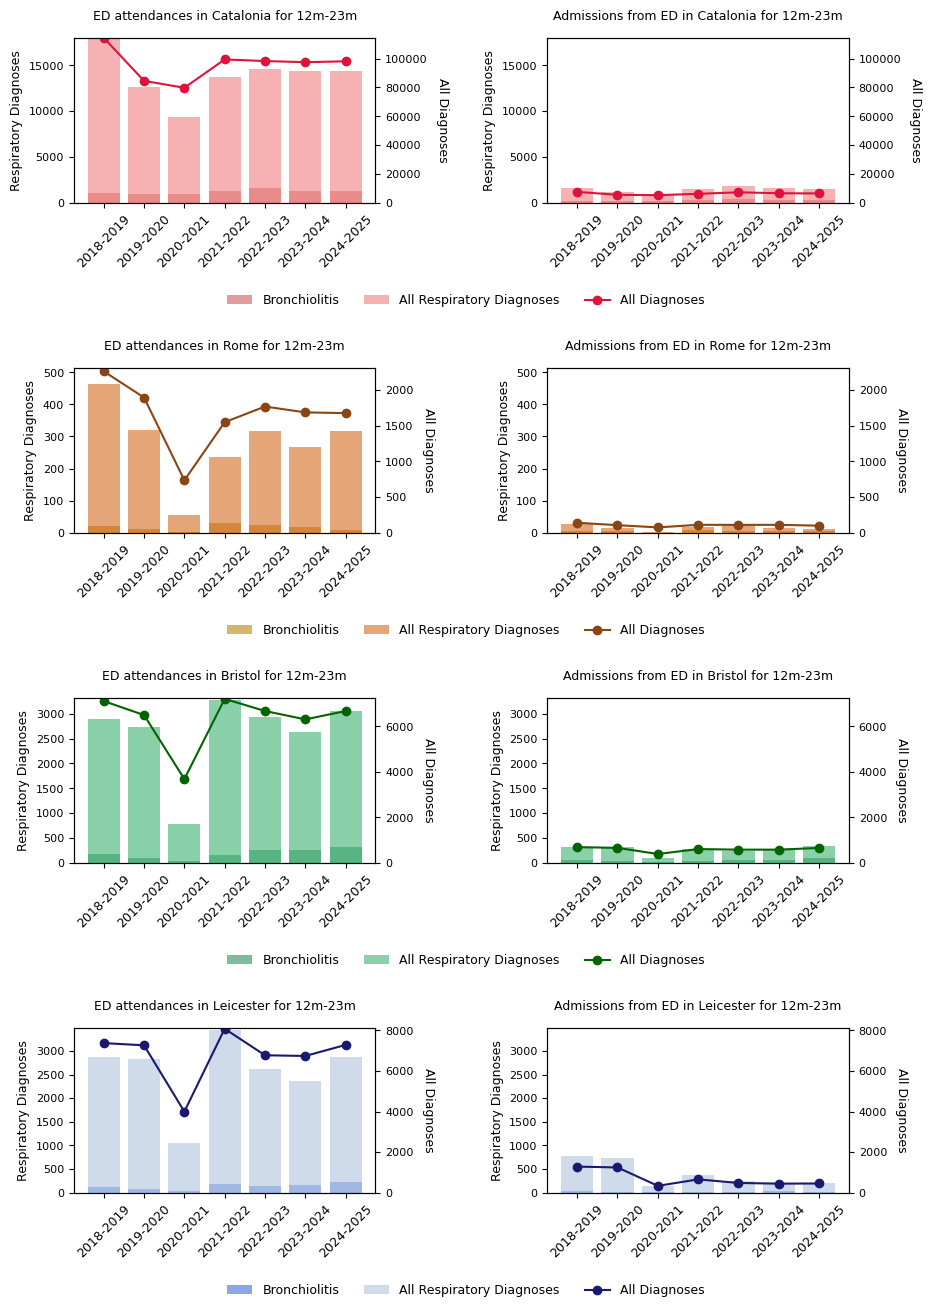

In [37]:
colors_by_region = {
    'Catalonia': {
        'all_diagnoses': 'crimson',         # Warm Pink
        'respiratory_diagnoses': 'lightcoral', # Darker Salmon
        'bronchiolitis_percent': 'indianred', # Orange Red
        'bronchiolitis_percent2': '#B22222' # Firebrick Red
    },
    'Rome': {
        'all_diagnoses': 'saddlebrown',         # Saddle Brown
        'respiratory_diagnoses': 'chocolate', # Sienna
        'bronchiolitis_percent': 'darkgoldenrod', # Peru
        'bronchiolitis_percent2': '#D2691E' # Chocolate
    },
    'Bristol': {
        'all_diagnoses': 'darkgreen',         # Medium Green
        'respiratory_diagnoses': 'mediumseagreen', # Darker Green
        'bronchiolitis_percent': 'seagreen', # Sea Green
        'bronchiolitis_percent2': '#006400' # Dark Green
    },
        'Leicester': {
        'all_diagnoses': 'midnightblue',         # Light Steel Blue
        'respiratory_diagnoses': 'lightsteelblue', # Steel Blue
        'bronchiolitis_percent': 'royalblue', # Dodger Blue
        'bronchiolitis_percent2': '#104E8B' # Dark Dodger Blue
    },
    'Glasgow': {
        'all_diagnoses': 'indigo',         # Royal Purple
        'respiratory_diagnoses': 'plum', # Pure Purple
        'bronchiolitis_percent': 'darkorchid', # Medium Purple
        'bronchiolitis_percent2': '#4B0082' # Indigo
    },
    'Edinburgh': {
        'all_diagnoses': 'orangered',         # Dark Orange
        'respiratory_diagnoses': 'lightsalmon', # Coral
        'bronchiolitis_percent': 'coral', # Tomato
        'bronchiolitis_percent2': '#DC143C' # Crimson
    },
    'Iceland': {
        'all_diagnoses': '#40E0D0',         # Turquoise
        'respiratory_diagnoses': '#48D1CC', # Medium Turquoise
        'bronchiolitis_percent': '#20B2AA', # Light Sea Green (turquoise-ish)
        'bronchiolitis_percent2': '#00CED1' # Dark Turquoise
    },
    'Romania': {
    'all_diagnoses': '#FFD700',         # Gold
    'respiratory_diagnoses': '#DAA520', # Goldenrod
    'bronchiolitis_percent': '#B8860B', # Dark Goldenrod
    'bronchiolitis_percent2': '#8B7500' # Dark Olive Goldenrod
}
}

regions1 = attendances_ED.Place.unique()[0:4]
regions1 = np.repeat(regions1, 2)
count = 0

age_group = "12m-23m"

# Filter data for the current age group
age_group_data = attendances_ED[attendances_ED['Age-group'] == age_group].copy()
age_group_data2 = admissions_ED[admissions_ED['Age-group'] == age_group].copy()

fig, axes = plt.subplots(4, 2, figsize=(10, 15), sharey=False)
axes = axes.flatten()
plt.rcParams['font.size'] = 8

for i, (ax, region) in enumerate(zip(axes, regions1)):  
    # Check if the index is even or odd
    if i % 2 == 0:  # Even index 
        region_data = age_group_data[age_group_data['Place'] == region]
    else:  # Odd index
        region_data = age_group_data2[age_group_data2['Place'] == region]

    region_data = region_data.sort_values(by='Season')
    region_colors = colors_by_region[region]

    bronquis = ax.bar(region_data['Season'], region_data['Bronchiolitis'], 
                           color=region_colors['bronchiolitis_percent'], label='Bronchiolitis', alpha=0.6)

    resp_diag_bars = ax.bar(region_data['Season'], region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'], 
                            color=region_colors['respiratory_diagnoses'], label='All Respiratory Diagnoses', alpha=0.6)
    
    ax2 = ax.twinx()

    alldiag_line = ax2.plot(region_data['Season'], region_data['All Diagnoses'], 
                            color=region_colors['all_diagnoses'], marker='o', label='All Diagnoses', linestyle = '-')
    
    ax.set_ylabel('Respiratory Diagnoses', fontsize = 9)
    ax2.set_ylabel('All Diagnoses', fontsize = 9, rotation = 270, labelpad = 15)

    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2
    
    ax.set_xticks(region_data['Season'])
    ax.set_xticklabels(region_data['Season'], rotation=45, fontsize=9)

    if i % 2 == 0:  # Even index 
        ax.set_title(f'ED attendances in {region} for {age_group}', fontsize = 9, pad = 13)
        ax.set_ylim((0,max(region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'])+50))
        ax.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(1.3, -.7), ncol=3, frameon=False, fontsize = 9)
        ax2.set_ylim((0,max(region_data['All Diagnoses'])+50))
    else:  # Odd index 
        ss = age_group_data[age_group_data['Place'] == region]
        ax.set_title(f'Admissions from ED in {region} for {age_group}', fontsize = 9, pad = 13)
        ax.set_ylim((0,max(ss['Respiratory Diasgnoses (not including Bronchiolitis) '] + ss['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(ss['All Diagnoses'])+50))
    
plt.subplots_adjust(wspace=.57, hspace=1)

fig.savefig(f"Figure_S2A.pdf", dpi=600, bbox_inches='tight')


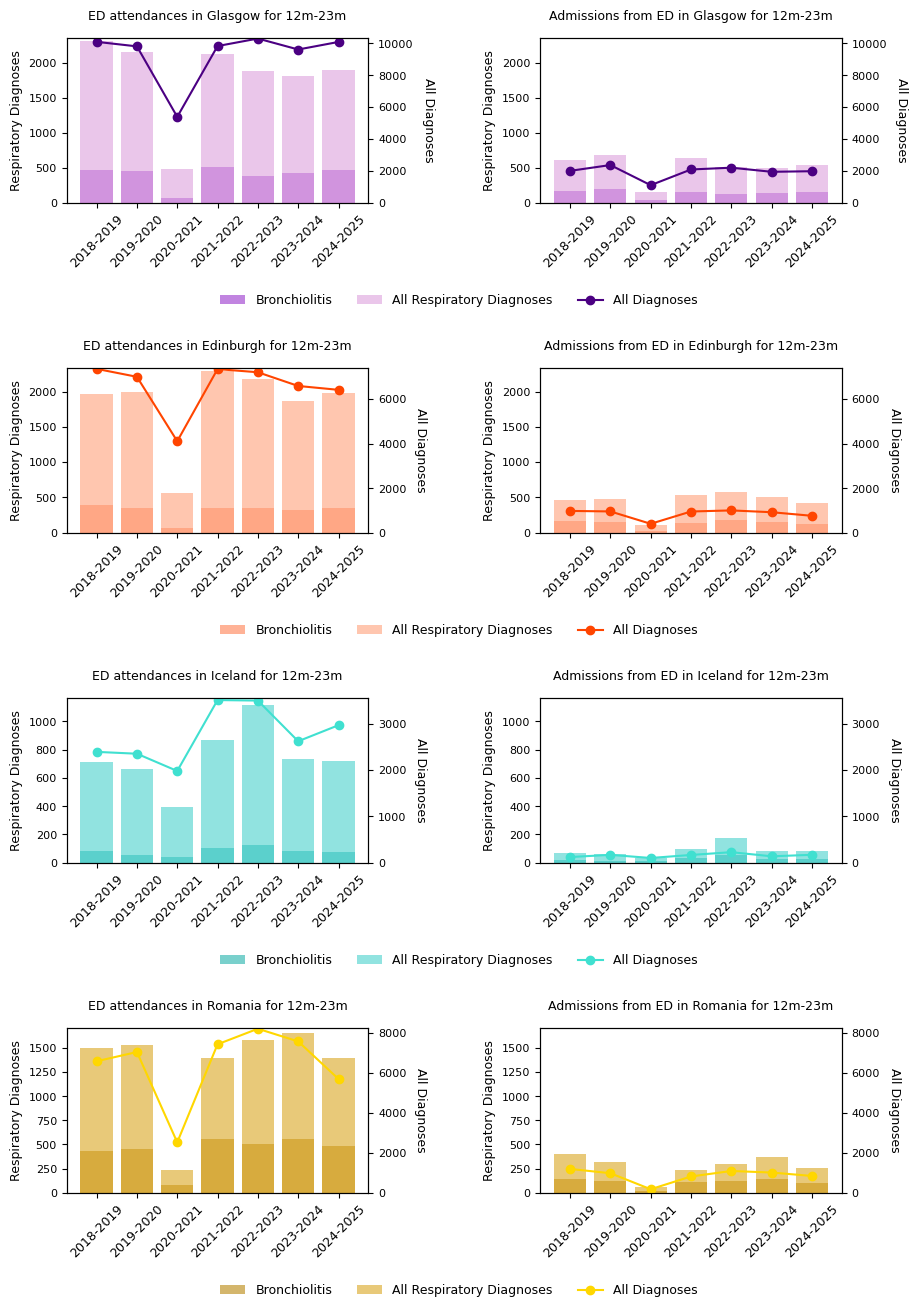

In [36]:
colors_by_region = {
    'Catalonia': {
        'all_diagnoses': 'crimson',         # Warm Pink
        'respiratory_diagnoses': 'lightcoral', # Darker Salmon
        'bronchiolitis_percent': 'indianred', # Orange Red
        'bronchiolitis_percent2': '#B22222' # Firebrick Red
    },
    'Rome': {
        'all_diagnoses': 'saddlebrown',         # Saddle Brown
        'respiratory_diagnoses': 'chocolate', # Sienna
        'bronchiolitis_percent': 'darkgoldenrod', # Peru
        'bronchiolitis_percent2': '#D2691E' # Chocolate
    },
    'Bristol': {
        'all_diagnoses': 'darkgreen',         # Medium Green
        'respiratory_diagnoses': 'mediumseagreen', # Darker Green
        'bronchiolitis_percent': 'seagreen', # Sea Green
        'bronchiolitis_percent2': '#006400' # Dark Green
    },
        'Leicester': {
        'all_diagnoses': 'midnightblue',         # Light Steel Blue
        'respiratory_diagnoses': 'lightsteelblue', # Steel Blue
        'bronchiolitis_percent': 'royalblue', # Dodger Blue
        'bronchiolitis_percent2': '#104E8B' # Dark Dodger Blue
    },
    'Glasgow': {
        'all_diagnoses': 'indigo',         # Royal Purple
        'respiratory_diagnoses': 'plum', # Pure Purple
        'bronchiolitis_percent': 'darkorchid', # Medium Purple
        'bronchiolitis_percent2': '#4B0082' # Indigo
    },
    'Edinburgh': {
        'all_diagnoses': 'orangered',         # Dark Orange
        'respiratory_diagnoses': 'lightsalmon', # Coral
        'bronchiolitis_percent': 'coral', # Tomato
        'bronchiolitis_percent2': '#DC143C' # Crimson
    },
    'Iceland': {
        'all_diagnoses': '#40E0D0',         # Turquoise
        'respiratory_diagnoses': '#48D1CC', # Medium Turquoise
        'bronchiolitis_percent': '#20B2AA', # Light Sea Green (turquoise-ish)
        'bronchiolitis_percent2': '#00CED1' # Dark Turquoise
    },
    'Romania': {
    'all_diagnoses': '#FFD700',         # Gold
    'respiratory_diagnoses': '#DAA520', # Goldenrod
    'bronchiolitis_percent': '#B8860B', # Dark Goldenrod
    'bronchiolitis_percent2': '#8B7500' # Dark Olive Goldenrod
}
}

regions1 = attendances_ED.Place.unique()[4:]
regions1 = np.repeat(regions1, 2)
count = 0

age_group = "12m-23m"

# Filter data for the current age group
age_group_data = attendances_ED[attendances_ED['Age-group'] == age_group].copy()
age_group_data2 = admissions_ED[admissions_ED['Age-group'] == age_group].copy()

fig, axes = plt.subplots(4, 2, figsize=(10, 15), sharey=False)
axes = axes.flatten()
plt.rcParams['font.size'] = 8

for i, (ax, region) in enumerate(zip(axes, regions1)):  
    # Check if the index is even or odd
    if i % 2 == 0:  # Even index 
        region_data = age_group_data[age_group_data['Place'] == region]
    else:  # Odd index
        region_data = age_group_data2[age_group_data2['Place'] == region]

    region_data = region_data.sort_values(by='Season')
    region_colors = colors_by_region[region]

    bronquis = ax.bar(region_data['Season'], region_data['Bronchiolitis'], 
                           color=region_colors['bronchiolitis_percent'], label='Bronchiolitis', alpha=0.6)

    resp_diag_bars = ax.bar(region_data['Season'], region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'], 
                            color=region_colors['respiratory_diagnoses'], label='All Respiratory Diagnoses', alpha=0.6)
    
    ax2 = ax.twinx()

    alldiag_line = ax2.plot(region_data['Season'], region_data['All Diagnoses'], 
                            color=region_colors['all_diagnoses'], marker='o', label='All Diagnoses', linestyle = '-')
    
    ax.set_ylabel('Respiratory Diagnoses', fontsize = 9)
    ax2.set_ylabel('All Diagnoses', fontsize = 9, rotation = 270, labelpad = 15)

    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2
    
    ax.set_xticks(region_data['Season'])
    ax.set_xticklabels(region_data['Season'], rotation=45, fontsize=9)

    if i % 2 == 0:  # Even index 
        ax.set_title(f'ED attendances in {region} for {age_group}', fontsize = 9, pad = 13)
        ax.set_ylim((0,max(region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'])+50))
        ax.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(1.3, -.7), ncol=3, frameon=False, fontsize = 9)
        ax2.set_ylim((0,max(region_data['All Diagnoses'])+50))
    else:  # Odd index 
        ss = age_group_data[age_group_data['Place'] == region]
        ax.set_title(f'Admissions from ED in {region} for {age_group}', fontsize = 9, pad = 13)
        ax.set_ylim((0,max(ss['Respiratory Diasgnoses (not including Bronchiolitis) '] + ss['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(ss['All Diagnoses'])+50))
    
plt.subplots_adjust(wspace=.57, hspace=1)

fig.savefig(f"Figure_S2B.pdf", dpi=600, bbox_inches='tight')


In [21]:
admissions_ED.to_excel("admissionsED.xlsx")

In [22]:
attendances_ED.to_excel("attendancesED.xlsx")